In [1]:
## for data handling 
import pandas as pd
import numpy as np

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

In [4]:
tappy_df=pd.read_csv('Imputed_ALLdata_Ivan.csv') 

In [5]:
list(tappy_df.columns)

['LLHold',
 'LLLatency',
 'LRHold',
 'LRLatency',
 'LSHold',
 'LSLatency',
 'RLHold',
 'RLLatency',
 'RRHold',
 'RRLatency',
 'RSHold',
 'RSLatency',
 'SLHold',
 'SLLatency',
 'SRHold',
 'SRLatency',
 'SSHold',
 'SSLatency',
 'LLHoldStd',
 'LLLatencyStd',
 'LRHoldStd',
 'LRLatencyStd',
 'LSHoldStd',
 'LSLatencyStd',
 'RLHoldStd',
 'RLLatencyStd',
 'RRHoldStd',
 'RRLatencyStd',
 'RSHoldStd',
 'RSLatencyStd',
 'SLHoldStd',
 'SLLatencyStd',
 'SRHoldStd',
 'SRLatencyStd',
 'SSHoldStd',
 'SSLatencyStd',
 'LLHoldSkew',
 'LLLatencySkew',
 'LRHoldSkew',
 'LRLatencySkew',
 'LSHoldSkew',
 'LSLatencySkew',
 'RLHoldSkew',
 'RLLatencySkew',
 'RRHoldSkew',
 'RRLatencySkew',
 'RSHoldSkew',
 'RSLatencySkew',
 'SLHoldSkew',
 'SLLatencySkew',
 'SRHoldSkew',
 'SRLatencySkew',
 'SSHoldSkew',
 'SSLatencySkew',
 'LLHoldKurt',
 'LLLatencyKurt',
 'LRHoldKurt',
 'LRLatencyKurt',
 'LSHoldKurt',
 'LSLatencyKurt',
 'RLHoldKurt',
 'RLLatencyKurt',
 'RRHoldKurt',
 'RRLatencyKurt',
 'RSHoldKurt',
 'RSLatencyKurt',
 

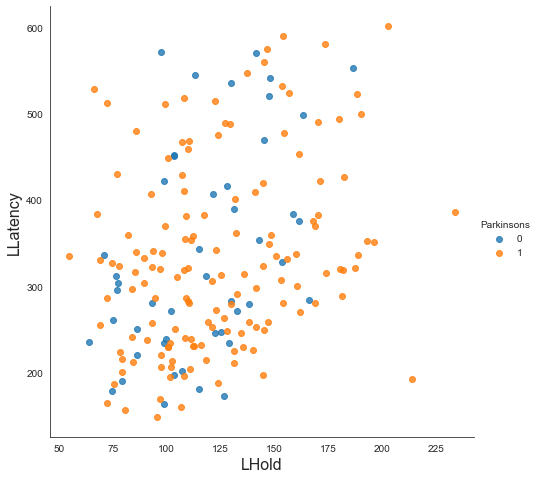

In [6]:
sns.lmplot(data = tappy_df, x = 'LHold', 
            y = 'LLatency',hue='Parkinsons',fit_reg=False,
            height = 6.5,legend=True)

#plt.legend(title='Parkinsons', loc='upper left', 
#          labels=['no', 'yes'], 
#           fontsize = 12)
plt.xlabel("LHold",fontsize = 16)
plt.ylabel("LLatency",fontsize = 16)

plt.show()

In [11]:
X = tappy_df.loc[:,'LLHold':'SLatencyKurt'].to_numpy()
y = tappy_df[['Parkinsons']].to_numpy()

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 440, 
                                                    shuffle=True,
                                                    stratify=y)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
def get_acc(model,X,y):
    pred = model.predict(X)
    return np.sum(pred == y)/len(y)

In [17]:
from sklearn.model_selection import StratifiedKFold

In [18]:
kfold = StratifiedKFold(5,shuffle = True,random_state = 440)

In [19]:
#CV
max_neighbors = 30

accs = np.zeros((5,max_neighbors))

## keep track of the train test split
j = 0


for train_index, test_index in kfold.split(X_train,y_train):
    # Get the cv train test split
    X_train_train, X_train_test = X_train[train_index], X_train[test_index]
    y_train_train, y_train_test = y_train[train_index], y_train[test_index]
    for i in range(1,max_neighbors+1):
        knn = KNeighborsClassifier(i)
        
        # fit the model
        knn.fit(X_train_train, y_train_train.ravel())
        
        accs[j,i-1] = get_acc(knn, X_train_test, y_train_test.ravel())
        
    j=j+1

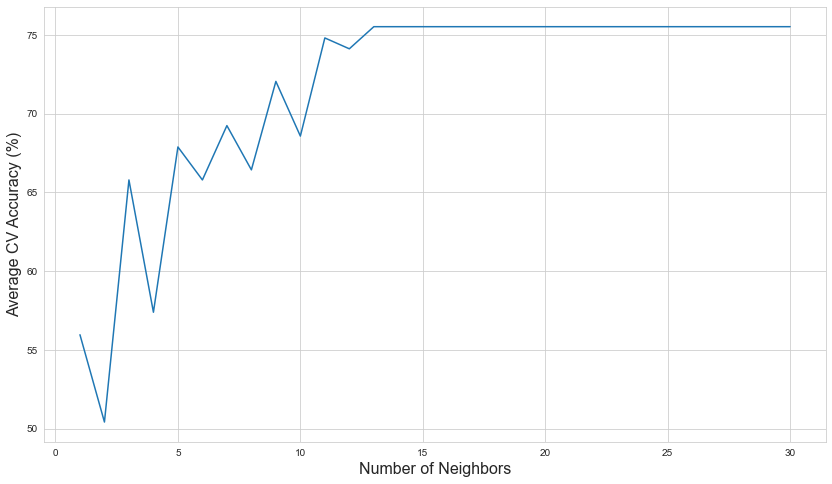

In [20]:
# Plot how the accuracy changes
sns.set_style("whitegrid")

plt.figure(figsize=(14,8))

plt.plot(range(1,max_neighbors+1), 100*np.mean(accs, axis=0))

plt.xlabel("Number of Neighbors", fontsize=16)
plt.ylabel("Average CV Accuracy (%)", fontsize=16)

plt.show()

In [22]:
knn = KNeighborsClassifier(n_neighbors = 13)

knn.fit(X_train,y_train.ravel())

get_acc(knn,X_test,y_test.ravel())

0.75